In [20]:
#imports
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from sklearn.model_selection import train_test_split , RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



In [21]:
df = pd.read_excel("default of credit card clients.xls")

In [22]:
df.shape

(30000, 25)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [24]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [25]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

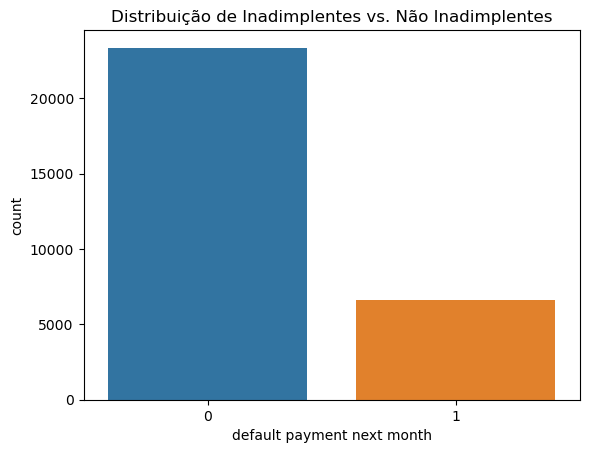

In [26]:
sns.countplot(x=df["default payment next month"])
plt.title("Distribuição de Inadimplentes vs. Não Inadimplentes")
plt.show()


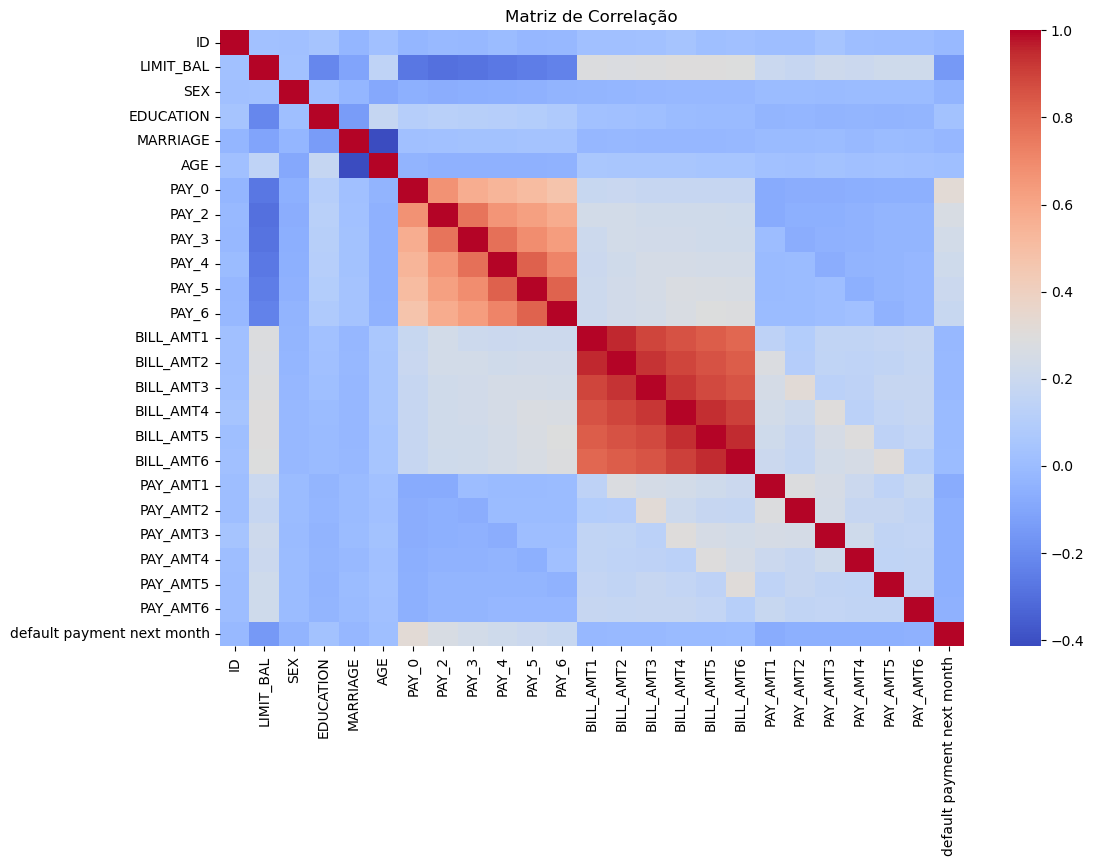

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de Correlação")
plt.show()


In [28]:
#Separar features e target
X = df.drop(columns=["default payment next month"])  # Remover a variável alvo
y = df["default payment next month"]

In [29]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Criar um pipeline com padronização e PCA
pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Padroniza os dados antes do PCA
    ("pca", PCA(n_components=0.95))  # Mantém 95% da variância
])

In [31]:
# Ajustar o PCA nos dados de treino e transformar os dados
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

In [32]:
num_componentes = pca_pipeline.named_steps["pca"].n_components_
print(f"O PCA reduziu as variáveis de {X_train.shape[1]} para {num_componentes} componentes.")

O PCA reduziu as variáveis de 24 para 16 componentes.


In [33]:
modelos = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [34]:
param_grid = {
    "Logistic Regression": {"C": np.logspace(-3, 2, 10)},
    "Decision Tree": {"max_depth": [5, 10, 20, None]},
    "SVM": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf"]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [10, 20, 30]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]},
    "XGBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
}

In [35]:
# Configurar validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

2025/03/31 21:31:21 INFO mlflow.tracking.fluent: Experiment with name 'Padrao' does not exist. Creating a new experiment.



Treinando Logistic Regression...


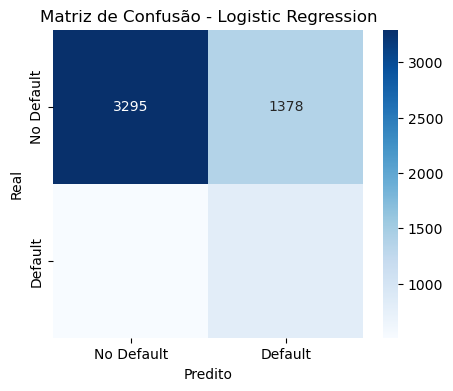

2025/03/31 21:31:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para Logistic Regression: {'C': 0.001}
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4673
           1       0.37      0.61      0.46      1327

    accuracy                           0.69      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.69      0.71      6000


Treinando Decision Tree...


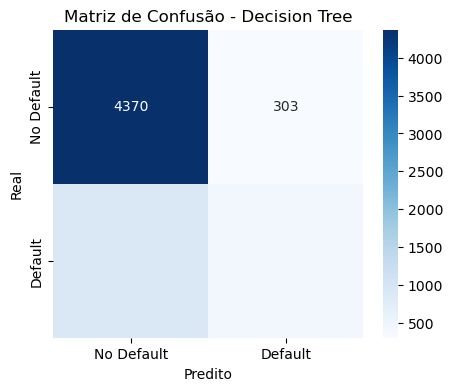

2025/03/31 21:31:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para Decision Tree: {'max_depth': 5}
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.59      0.32      0.42      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000


Treinando SVM...


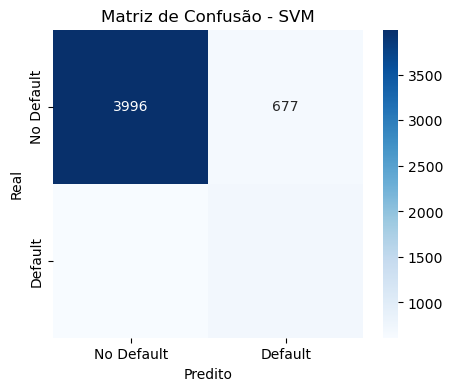

2025/03/31 21:54:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para SVM: {'kernel': 'rbf', 'C': 0.1}
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4673
           1       0.51      0.54      0.53      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.79      0.79      6000


Treinando Random Forest...


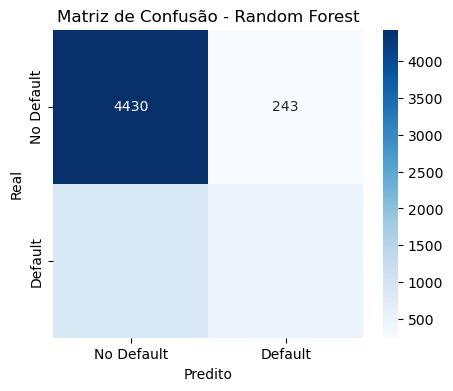

2025/03/31 21:56:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para Random Forest: {'n_estimators': 50, 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000


Treinando Gradient Boosting...


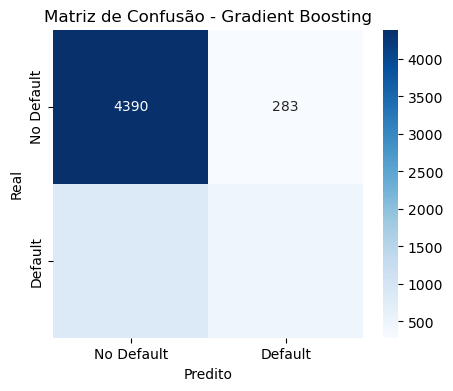

2025/03/31 21:59:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para Gradient Boosting: {'n_estimators': 100, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Treinando XGBoost...


c:\Users\jorge\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:00:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


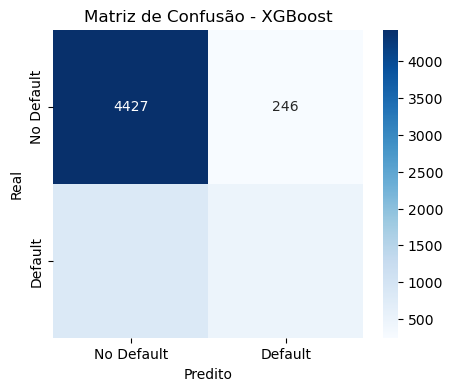

2025/03/31 22:00:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melhores parâmetros para XGBoost: {'n_estimators': 50, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Epoch 1/10


c:\Users\jorge\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7661 - loss: 0.5187 - val_accuracy: 0.8080 - val_loss: 0.4589
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8040 - loss: 0.4554 - val_accuracy: 0.8107 - val_loss: 0.4510
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8121 - loss: 0.4448 - val_accuracy: 0.8093 - val_loss: 0.4498
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8129 - loss: 0.4414 - val_accuracy: 0.8143 - val_loss: 0.4504
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8101 - loss: 0.4438 - val_accuracy: 0.8137 - val_loss: 0.4435
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4359 - val_accuracy: 0.8143 - val_loss: 0.4438
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8179 - loss: 0.4374 - val_accuracy: 0.8188 - val_loss: 0.4421
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8186 - loss: 0.4321 - val_accuracy: 0.8183 - val_

2025/03/31 22:00:25 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/31 22:00:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch 1/10


c:\Users\jorge\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7718 - loss: 0.5492 - val_accuracy: 0.8038 - val_loss: 0.4580
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8054 - loss: 0.4595 - val_accuracy: 0.8040 - val_loss: 0.4523
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8038 - loss: 0.4572 - val_accuracy: 0.8040 - val_loss: 0.4514
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8059 - loss: 0.4477 - val_accuracy: 0.8052 - val_loss: 0.4509
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8082 - loss: 0.4474 - val_accuracy: 0.8085 - val_loss: 0.4525
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8116 - loss: 0.4490 - val_accuracy: 0.8073 - val_loss: 0.4469
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8135 - loss: 0.4388 - val_accuracy: 0.8055 - val_loss: 0.4482
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8132 - loss: 0.4415 - val_accuracy: 0.8075 - val_

2025/03/31 22:01:05 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/31 22:01:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [36]:
mlflow.set_experiment("Padrao")

melhores_modelos = {}

for nome, modelo in modelos.items():
    with mlflow.start_run(run_name=nome):
        print(f"\nTreinando {nome}...")
        
        # Criar RandomizedSearchCV
        random_search = RandomizedSearchCV(modelo, param_grid[nome], n_iter=10, cv=cv, scoring="accuracy", n_jobs=-1, random_state=42)
        random_search.fit(X_train_pca, y_train)
        
        melhores_modelos[nome] = random_search.best_estimator_
        y_pred = random_search.best_estimator_.predict(X_test_pca)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Matriz de confusão
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
        plt.title(f"Matriz de Confusão - {nome}")
        plt.xlabel("Predito")
        plt.ylabel("Real")
        plt.show()

        # Logar no MLflow
        mlflow.log_params(random_search.best_params_)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.sklearn.log_model(random_search.best_estimator_, "model")

        print(f"Melhores parâmetros para {nome}: {random_search.best_params_}")
        print(classification_report(y_test, y_pred))

# 8️⃣ Criar modelos RNN e LSTM
def build_rnn():
    model = Sequential([
        SimpleRNN(64, activation="relu", input_shape=(num_componentes, 1)),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_lstm():
    model = Sequential([
        LSTM(64, activation="relu", input_shape=(num_componentes, 1)),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Transformar dados para RNN/LSTM (expandir dimensão)
X_train_rnn = np.expand_dims(X_train_pca, axis=-1)
X_test_rnn = np.expand_dims(X_test_pca, axis=-1)

# Treinar RNN
with mlflow.start_run(run_name="RNN"):
    rnn_model = build_rnn()
    rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)
    y_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_rnn)
    f1 = f1_score(y_test, y_pred_rnn)
    precision = precision_score(y_test, y_pred_rnn)
    recall = recall_score(y_test, y_pred_rnn)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.tensorflow.log_model(rnn_model, "model")

# Treinar LSTM
with mlflow.start_run(run_name="LSTM"):
    lstm_model = build_lstm()
    lstm_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)
    y_pred_lstm = (lstm_model.predict(X_test_rnn) > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_lstm)
    f1 = f1_score(y_test, y_pred_lstm)
    precision = precision_score(y_test, y_pred_lstm)
    recall = recall_score(y_test, y_pred_lstm)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.tensorflow.log_model(lstm_model, "model")

In [37]:
melhores_modelos

{'Logistic Regression': LogisticRegression(C=0.001, class_weight='balanced'),
 'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'SVM': SVC(C=0.1, class_weight='balanced'),
 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=50),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
       